In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [7]:
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
df = pd.read_csv(url)

In [8]:
df.to_csv("iris.csv", index=False)

In [9]:
print("Iris dataset loaded successfully!")
print(df.head())

Iris dataset loaded successfully!
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [10]:
X = df.drop('species', axis=1)
y = df['species']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [12]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [13]:
y_pred = model.predict(X_test)

In [14]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

In [15]:
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


In [16]:
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy

In [17]:
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

In [18]:
print(f"\nAccuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision (Macro Avg): {precision:.2f}")
print(f"Recall (Macro Avg): {recall:.2f}")


Accuracy: 1.00
Error Rate: 0.00
Precision (Macro Avg): 1.00
Recall (Macro Avg): 1.00


In [19]:
import numpy as np

In [20]:
classes = model.classes_
for i, class_name in enumerate(classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    
    print(f"\nClass: {class_name}")
    print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")


Class: setosa
TP: 13, FP: 0, TN: 25, FN: 0

Class: versicolor
TP: 16, FP: 0, TN: 22, FN: 0

Class: virginica
TP: 9, FP: 0, TN: 29, FN: 0


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

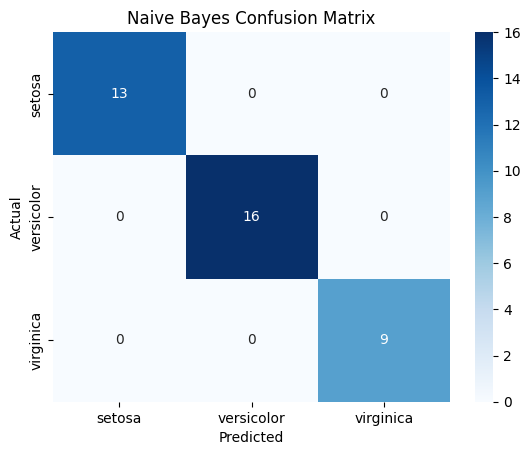

In [22]:
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()